In [3]:
pothole_path = '/Users/zijielei/PycharmProjects/mindspark-hackathon-Huixian-Gong/Dataset/Pothole'
normal_path = '/Users/zijielei/PycharmProjects/mindspark-hackathon-Huixian-Gong/Dataset/Normal'

In [ ]:
import os
# List all files in the directory
image_files = os.listdir(pothole_path)

# Sort the files to ensure consistent numbering
image_files.sort()

# Initialize an index counter
index = 1

# Loop through the image files and rename them
for image_file in image_files:
    # Check if the file is an image (you can add more image extensions as needed)
    if image_file.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
        # Generate the new filename with the index
        new_filename = f"{index:04d}.jpg"  # Adjust the format as needed (e.g., {index}.jpg)
        
        # Construct the full paths to the old and new filenames
        old_path = os.path.join(pothole_path, image_file)
        new_path = os.path.join(pothole_path, new_filename)
        
        # Rename the file
        os.rename(old_path, new_path)
        
        # Increment the index
        index += 1

print("Images renamed and indexed successfully.")


In [ ]:
import os

# Replace 'path_to_images' with the path to the directory containing your images.

# List all files in the directory
image_files = os.listdir(normal_path)

# Sort the files to ensure consistent numbering
image_files.sort()

# Initialize an index counter
index = 1

# Loop through the image files and rename them
for image_file in image_files:
    # Check if the file is an image (you can add more image extensions as needed)
    if image_file.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):
        # Generate the new filename with the index
        new_filename = f"{index:04d}.jpg"  # Adjust the format as needed (e.g., {index}.jpg)
        
        # Construct the full paths to the old and new filenames
        old_path = os.path.join(normal_path, image_file)
        new_path = os.path.join(normal_path, new_filename)
        
        # Rename the file
        os.rename(old_path, new_path)
        
        # Increment the index
        index += 1

print("Images renamed and indexed successfully.")


In [4]:
import cv2
import os
import matplotlib.pyplot as plt

# Directory containing the images

# List all image files in the directory
pothole_images = [f for f in os.listdir(pothole_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# Initialize a list to store the loaded images
pothole = []

# Loop through the image files and load each image

for image_file in pothole_images:
    image_path = os.path.join(pothole_path, image_file)
    image = cv2.imread(image_path)
    
    if image is not None:
        pothole.append(image)
    else:
        print(f"Could not load image: {image_path}")

len(pothole)

704

In [5]:
import cv2
import os
import matplotlib.pyplot as plt

# Directory containing the images

# List all image files in the directory
normal_images = [f for f in os.listdir(normal_path) if f.endswith(('.jpg', '.jpeg', '.png', '.gif'))]

# Initialize a list to store the loaded images
normal = []

# Loop through the image files and load each image
for image_file in normal_images:
    image_path = os.path.join(normal_path, image_file)
    image = cv2.imread(image_path)
    
    if image is not None:
        normal.append(image)
    else:
        print(f"Could not load image: {image_path}")

len(normal)

492

In [6]:
from statistics import mean

print("Max width pixels: " + str(max([i.shape[0] for i in pothole])))
print("Min width pixels: " + str(min([i.shape[0] for i in pothole])))
print("Max height pixels: " + str(max([i.shape[1] for i in pothole])))
print("Min height pixels: " + str(min([i.shape[1] for i in pothole])))
print("Avg width pixels: " + str(mean([i.shape[0] for i in pothole])))
print("Avg height pixels: " + str(mean([i.shape[1] for i in pothole])))

Max width pixels: 2365
Min width pixels: 140
Max height pixels: 3200
Min height pixels: 300
Avg width pixels: 377.47585227272725
Avg height pixels: 490.67897727272725


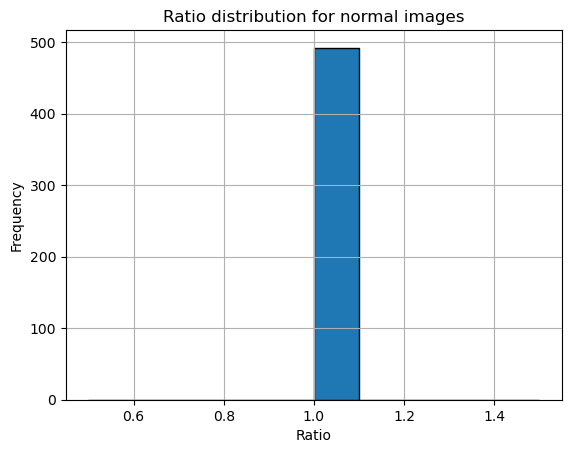

In [15]:
normal_ratio = [i.shape[0] / i.shape[1] for i in normal]
plt.hist(normal_ratio, bins=10, edgecolor='black')  # 'bins' determines the number of bins or bars
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Ratio distribution for normal images')
plt.grid(True)  # Add a grid for clarity, optional
plt.show()

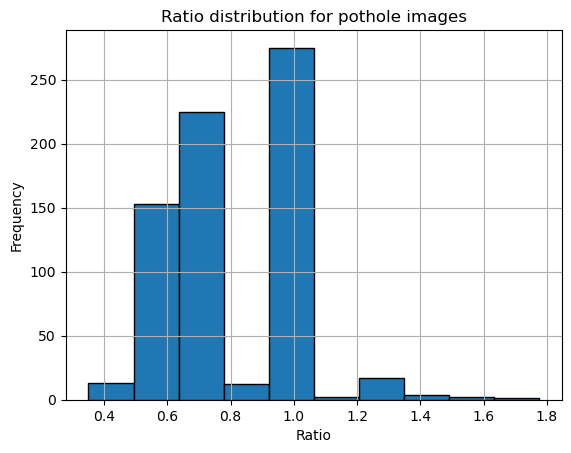

In [16]:
pothole_ratio = [i.shape[0] / i.shape[1] for i in pothole]
plt.hist(pothole_ratio, bins=10, edgecolor='black')  # 'bins' determines the number of bins or bars
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Ratio distribution for pothole images')
plt.grid(True)  # Add a grid for clarity, optional
plt.show()